# Learning objectives
1. Refresh basic ML tools
- Get the data
- Train a linear model
- Measure the model performance
- Select the best model
2. Learn some data preprocessing and feature engineering techniques for linear models
- Binning
- Polynomial features
3. Get familiar with factorization machines


# Working with data in Python
In this course we will use several Python libraries that simplify and speed-up data processing and visualization.

## numpy
`numpy` (https://www.numpy.org/) is a library that provides effective implementation of large multi-dimensional arrays and matrices, along with a large collection of high-level mathematical operations.
We will use numpy arrays to store features and labels.

In [ ]:
import numpy as np

a = np.array([
    [3, 2],
    [1, 4],
    [5, 5],
])
print("shape:", a.shape)
print("ndim:", a.ndim)
print("second row:", a[1, :])
print("all columns except the first:\n", a[:, 1:])

shape: (3, 2)
ndim: 2
second row: [1 4]
all columns except the first:
 [[2]
 [4]
 [5]]


In [ ]:
b = np.array([1,1,0])

print("shape:", b.shape)
print("ndim:", b.ndim)
print("second element:", b[1])
print(b[1:2])

print("mean:", np.mean(b))
print("std:", np.std(b))
print("b normalized:", (b - np.mean(b)) / np.std(b))

shape: (3,)
ndim: 1
second element: 1
[1]
mean: 0.6666666666666666
std: 0.4714045207910317
b normalized: [ 0.70710678  0.70710678 -1.41421356]


More examples of numpy usage: https://docs.scipy.org/doc/numpy/user/quickstart.html

## pandas
`pandas` (https://pandas.pydata.org/) is a library for manipulating tabular data.
Pandas provides a data structure `Series` which basically represents a column of a table.
A collection of `Series` is called `DataFrame`.
Pandas is a powerful tool for manipulations with data, however in our course we will use it mostly for simple operations with data (such as basic data description, I/O and simple column transformations).

In [ ]:
import pandas as pd

s1 = pd.Series([1, 2, 3])
s2 = pd.Series(['a', 'b', 'b'])

# create Pandas dataframe
df = pd.DataFrame({
    'numeric': s1,
    'categorical': s2,
    'n2': pd.Series([4, 5, 6]),
})

In [ ]:
df.head()

,numeric,categorical,n2
0,1,a,4
1,2,b,5
2,3,b,6


In [ ]:
df.describe()

,numeric,n2
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0


In [ ]:
df['categorical'].value_counts()

b    2
a    1
Name: categorical, dtype: int64

More examples of pandas usage: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

## matplotlib
`matplotlib` (https://matplotlib.org/) is a plotting library.

[ 0  1  4  9 16 25 36 49 64 81]


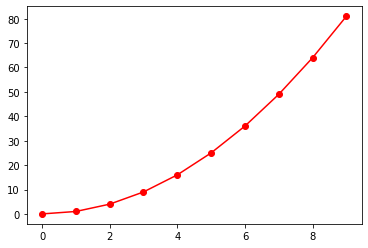

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
x = np.array(range(10))
y = x**2
print(y)
plt.plot(x, y, color='r', marker='o', linestyle='-')

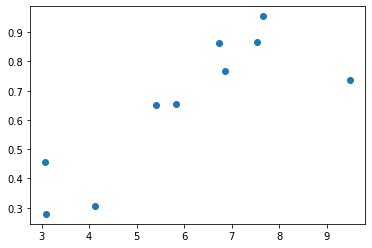

In [ ]:
x = np.random.random(10) * 10
y = np.random.random(10)
plt.scatter(x, y)

# Getting the data

In this exercise, we will try to predict median house prices in California city blocks (districts).
This is a *regression* problem.
The original dataset can be found here: https://github.com/ageron/handson-ml/tree/master/datasets/housing

The target value is stored in `median_house_value` column.

1. **longitude**: A measure of how far west a house is; a higher value is farther west
2. **latitude**: A measure of how far north a house is; a higher value is farther north
3. **housing_median_age**: Median age of a house within a block; a lower number is a newer building
4. **total_rooms**: Total number of rooms within a block
5. **total_bedrooms**: Total number of bedrooms within a block
6. **population**: Total number of people residing within a block
7. **households**: Total number of households, a group of people residing within a home unit, for a block
8. **median_income**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **median_house_value**: Median house value for households within a block (measured in US Dollars)
10. **ocean_proximity**: Location of the house w.r.t ocean/sea

(see https://www.kaggle.com/camnugent/california-housing-prices)

In [ ]:
original_df = pd.read_csv('https://raw.githubusercontent.com/horoshenkih/harbour-space-ds210/master/datasets/california_housing_prices.csv')
original_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Explore numeric data

In [ ]:
original_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Explore categorical data

In [ ]:
original_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Explore spatial data

Text(0, 0.5, 'latitude')

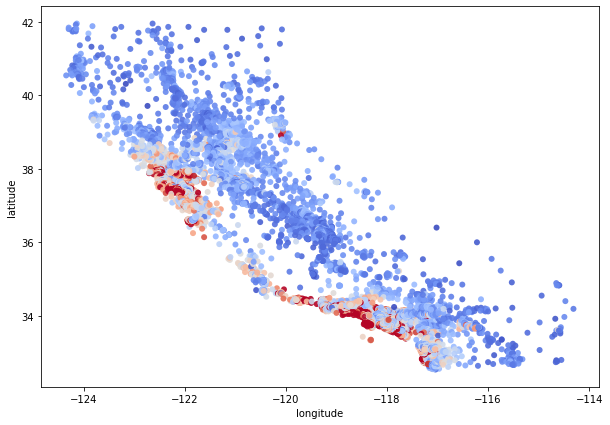

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(original_df.longitude, original_df.latitude, c=original_df.median_house_value,
            cmap=plt.cm.coolwarm, linewidths=0, alpha=0.9)
plt.xlabel("longitude")
plt.ylabel("latitude")

Check whether there are missing values

In [ ]:
original_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Fill missing values using the average value across the column

In [ ]:
# df.fillna(value) -- replace missing values
original_df['total_bedrooms'].fillna(
    original_df['total_bedrooms'].mean(),
    inplace=True
)
# check there are no missing values anymore
original_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Invent (mathematical) linear model for the data

According to the description of features, we may deduce that the target value (`median_house_value`) may depend linearly on:
- `median_income` (the higher the income, the higher the house price)
- `housing_median_age` (the higher the age, the lower the price)
- Housing area. Since we don't have exact data about it, we may use "proxy" features: number of rooms and bedrooms per household

Also, `ocean_proximity` may improve prediction, because location is clearly important, but we cannot directly use `longitude` and `latitude` (yet). Since we assume linear dependence, the only way to use `ocean_proximity` is to use *one-hot encoding*. The resulting linear model looks as follows:

$$
median\_house\_value \approx
w_1\,\cdot\,median\_income + w_2\,\cdot\,housing\_median\_age + w_3\,\cdot\,rooms\_per\_household + w_4\,\cdot\,bedrooms\_per\_household + w_5\,\cdot\,I(ocean\_proximity == \textrm{"<1H OCEAN"}) + w_6\,\cdot\,I(ocean\_proximity == \textrm{"INLAND"}) + w_7\,\cdot\,I(ocean\_proximity == \textrm{"NEAR OCEAN"}) + w_8\,\cdot\,I(ocean\_proximity == \textrm{"NEAR BAY"}) + w_9\,\cdot\,I(ocean\_proximity == \textrm{"ISLAND"})$$

where $I(x)$ is *indicator function*: it equals 1 when $x$ is true and 0 otherwise.

Let's check the dependence for `median_income`:

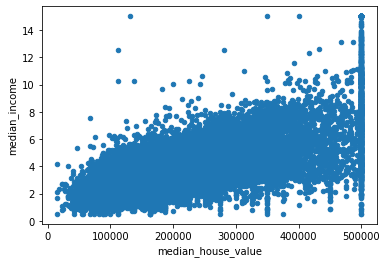

In [ ]:
original_df.plot.scatter('median_house_value', 'median_income')

In practice, there is no need to remove remaining features: if there is no linear dependence, a linear model (properly trained) should ignore them (learn zero weights).

# Machine learning algorithms in Python
One of the main tools to be studied in our course is `scikit-learn` library (https://scikit-learn.org/stable/index.html).
It contains implementations of many machine learning algorithms and also provides tools for ML-specific data preprocessing, model selection, evaluation etc.

First, deal with the categorical feature `ocean_proximity`. This is how "one-hot encoding" is implemented in Pandas.

In [ ]:
pd.get_dummies(original_df['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
df = pd.concat([original_df, pd.get_dummies(original_df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


Perform feature engineering according to our [mathematical model](https://colab.research.google.com/drive/1u1wxIiqjFZyhZKrjwcfnHC02P9dP2gFp#scrollTo=c0KuWHX1M7qA&line=2&uniqifier=1). It's easy with Pandas:

In [ ]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
# look at the dataset after feature engineering
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779,5.429000,1.104422
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963,2.474173,0.544522
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.846154,0.149866
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.440716,1.005857
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.229129,1.049084
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.052381,1.100398
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,141.909091,34.066667


In [ ]:
from sklearn.model_selection import train_test_split

X_columns = list(df.columns)
X_columns.remove('median_house_value')  # this is the target
X_columns.remove('ocean_proximity')  # this is one-hot encoded

X = df[X_columns].to_numpy()
y = df.median_house_value.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("X_train has shape", X_train.shape)
print("X_test has shape", X_test.shape)
print("y_train has shape", y_train.shape)
print("y_test has shape", y_test.shape)

X_train has shape (13828, 15)
X_test has shape (6812, 15)
y_train has shape (13828,)
y_test has shape (6812,)


The class `sklearn.linear_model.SGDRegressor` with `penalty='elasticnet'` implements the linear regression algorithm that minimizes the following objective function using Stochastic Gradient Descent:
$
\frac{1}{2 N} ||y - Xw||^2_2
+ \alpha  \beta  ||w||_1
+ \frac{1}{2} \alpha (1 - \beta) ||w||^2_2
$

As any other regressor (or classifier), implemented in `sklearn`,  `SGDRegressor` has the following interface:
- `fit(self, X, y)`: train the regressor using feature vectors `X` and corresponding labels `y`
- `predict(self, X)`: return an array of predictions for given feature vectors `X`

In [ ]:
from sklearn.linear_model import SGDRegressor

def base_regressor():
    return SGDRegressor(penalty='elasticnet')

clf = base_regressor()
clf.fit(X_train, y_train)

SGDRegressor(penalty='elasticnet')

# Estimating model performance
Have we trained a good model?
In order to answer this question, we need to compare predictions of the model with the answers on new data.
Here the "test" part of the data comes into play.

How do we compare predicitons with true labels?
Clearly, for each particular example in the test data, predicted value will be different from the true value (just because we predict the real-valued quantity), but it doesn't mean the model is bad.
If the difference between true and predicted label is not so high, we will be okay with that.
So for each example in the test set we can compute the "discrepancy" between true and predicted target, and after that we will average the results (because we need just one number to decide if the model is good or bad).

A popular quality measure for regression problem is the *mean squared error*, or MSE:
$$
MSE = \dfrac{1}{N}\sum\limits_{i=1}^N(y_{true} - y_{predicted})^2
$$
In order to have the quality measure in the same scale with the target, the *root mean squared error* (or RMSE) is often used:
$$
RMSE = \sqrt{MSE}
$$

Let us compute RMSE on both train and test data.


In [ ]:
from sklearn.metrics import mean_squared_error

def print_training_report(clf, X_train, y_train, X_test, y_test):
    pred_y_train = clf.predict(X_train)
    pred_y_test = clf.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, pred_y_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, pred_y_test))

    print("RMSE on train data: {} (relative error {:.1f}%)".format(train_rmse, 100 * train_rmse / np.mean(y_train)))
    print("RMSE on test data: {} (relative error {:.1f}%)".format(test_rmse, 100 * test_rmse / np.mean(y_train)))

print_training_report(clf, X_train, y_train, X_test, y_test)

RMSE on train data: 1177346918470881.5 (relative error 569692389853.3%)
RMSE on test data: 1169449500038008.2 (relative error 565871002027.7%)


As we see, train and test errors "blow up". It is not surprising, because we used default values of hyperparameters for `SGDRegressor`. Let's see how to find better hyperparameters (in other words, how to _select_ a better model).

# Cross-validation. Model selection

**We cannot use the test data to choose optimal hyperparameters!** In this case we lose the way to reliably estimate the performance.
Remember the following principle: *if the data is somehow used to tune the model, it becomes the training data*.

Instead, we can use *cross-validation*:
- First, we split the training data into $k$ equally-sized parts (folds).
- Then, we perform $k$ iterations of learning and validation: $k$-th fold is used for validation, other folds are for training.
- Finally, we aggregate the results from all $k$ folds.

![Cross-validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

The advantage of this method is that uses all training samples for training and evaluation; however, it may be slow for large datasets.

For more information about cross-validation and model selection in `sklearn`, read [the documentation](https://scikit-learn.org/stable/modules/cross_validation.html).

Cross-validation gives the estimated value of desired mectric (RMSE in our case) for a given combination of hyperparameters.

Two generic approaches to parameter search are provided in scikit-learn: 
- `GridSearchCV` exhaustively considers all parameter combinations;
- `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

For more information, see [the documentation](https://scikit-learn.org/stable/modules/grid_search.html).

A nice property of random search is that it is effectively explores more values of important parameters. Consider the case below:
![Grid search vs. Random search](https://i.stack.imgur.com/cIDuR.png)

Both Grid searcn and Random search need to explore 9 combinations. But since one of the parameters is unimportant, we may ignore it (it does not affect the result of cross-validation); thus, only 3 parameters are effectively explored in Grid search, and 9 in Random search.

Let's see how to perform model selection using cross-validation and randomized search strategy.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform

# sample uniformly in log scale
params_distributions = {
    # regularization parameters
    'alpha': loguniform(0.1, 10),
    'l1_ratio': uniform(0.1, 0.9),  # corresponds to U[0.1, 0.1+0.9]
    # learning rate
    'eta0': loguniform(1e-9, 1e-2),
}

# RandomizedSearchCV is a 'wrapper' which accepts the initial classifier (ElasticNet())
# and distribution of parameters to sample from
randomized_search_clf = RandomizedSearchCV(
    base_regressor(),
    params_distributions,
    n_iter=20,  # try 20 combinations of parameters
    cv=3,  # for each combination, perform 3-fold cross-validation
    random_state=0,
)
randomized_search_clf.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=SGDRegressor(penalty='elasticnet'),
                   n_iter=20,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75f2969fd0>,
                                        'eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75f2c53940>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75f2c53ee0>},
                   random_state=0)

Let's see which values of parameters have been chosen

In [ ]:
randomized_search_clf.best_params_

{'alpha': 2.1941976179005755,
 'eta0': 2.969463063254474e-08,
 'l1_ratio': 0.21603366788936798}

Compare train/test errors as before

In [ ]:
print_training_report(randomized_search_clf, X_train, y_train, X_test, y_test)

RMSE on train data: 108508.47015595403 (relative error 52.5%)
RMSE on test data: 108986.07014363201 (relative error 52.7%)


The error decreased but it's still high. Let's explore feature engineering techniques that improve performance of linear models.

# Feature engineering 1: binning

The data has clear spatial dependence

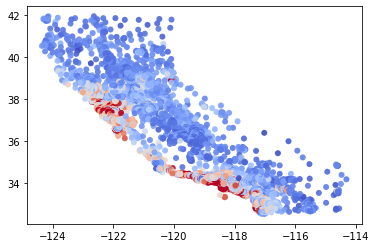

In [ ]:
plt.scatter(original_df.longitude, original_df.latitude, c=original_df.median_house_value,
            cmap=plt.cm.coolwarm, linewidths=0, alpha=0.9)

However, dependence between the target variable and longitude/latitude is clearly nonlinear:

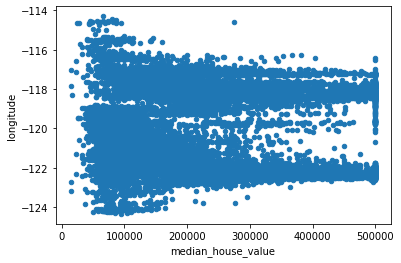

In [ ]:
df.plot.scatter('median_house_value', 'longitude')

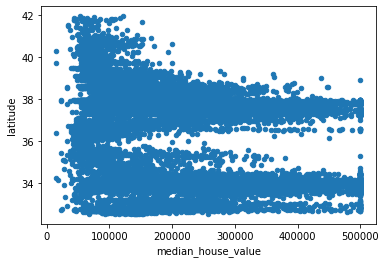

In [ ]:
df.plot.scatter('median_house_value', 'latitude')

Instead of using one weight for each feature we can use *binning*
1. Split the range of values of the feature into "regions"
2. Create a boolean feature for each region (much like one-hot encoding).

We will use splits which have equal number of training examples in each region. See the example below:

In [ ]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

a = np.array([
    [1],
    [3],
])
b = np.array([
    [0],
    [1],
    [4],
    [2.1],
])

bn = KBinsDiscretizer(n_bins=2, encode='onehot', strategy='quantile')
bn.fit(a)
# by default, KBinsDiscretizer transforms into sparse matrices, use .todense() method for clarity
print("a=\n", bn.transform(a).todense())
print("b=\n", bn.transform(b).todense())

a=
 [[1. 0.]
 [0. 1.]]
b=
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


`KBinsDiscretizer` has `fit()/transform()` interface:
- Using `fit()`, it "learns" how to split features into bins
- Using `transform()`, it splits each feature in the input array into bins

Since there is another stage that needs to "learn" (and transform) something, we combine stages into so-called *Pipeline*.

`sklearn.pipeline.Pipeline` allows to create a chain of "transformers" and classifiers.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer

# Pipeline accepts a list of stages
# each stage is a tuple (name, class)
# name is needed to set parameters of the pipeline: name__parametername
pipe = Pipeline([
    ('binner', KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile')),
    ('clf', base_regressor()),
])

# note the names of parameters: clf__<param name>
params_distributions = {
    'clf__alpha': loguniform(0.1, 10),
    'clf__l1_ratio': uniform(0.1, 0.9),
    'clf__eta0': loguniform(1e-9, 1e-2),
}
randomized_search_clf = RandomizedSearchCV(
    pipe,  # Pipeline has the same interface as Estimator
    params_distributions,
    n_iter=20,
    cv=3,
    random_state=0,
)
randomized_search_clf.fit(X_train, y_train)

In [ ]:
randomized_search_clf.best_params_

{'clf__alpha': 0.7501954443620119,
 'clf__eta0': 0.0017474751375465012,
 'clf__l1_ratio': 0.9672964844509263}

In [ ]:
print_training_report(randomized_search_clf, X_train, y_train, X_test, y_test)

RMSE on train data: 69798.4869631408 (relative error 33.8%)
RMSE on test data: 70881.51723278615 (relative error 34.3%)


As we see, error dropped significantly.

# Feature engineering 2: polynomial features

Some features (like latitude and longitude) may interact to each other.
Linear model is linear by **weights**, but the features may be polynomial.
Since after the previous step we are using only boolean features, we are not interested in features like $x_i^2$, because for boolean features $x_i^2 = x_i$.

See the example below:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

a = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

trf = PolynomialFeatures(2, interaction_only=True, include_bias=False)
print(trf.fit(a).transform(a))

[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]]


In [ ]:
# add PolynomialFeatures to the pipeline
pipe = Pipeline([
    ('binner', KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile')),
    ('poly', PolynomialFeatures(2, interaction_only=True, include_bias=False)), 
    ('clf', base_regressor()),
])

# note the names of parameters: clf__<param name>
params_distributions = {
    'clf__alpha': loguniform(0.1, 10),
    'clf__l1_ratio': uniform(0.1, 0.9),
    'clf__eta0': loguniform(1e-9, 1e-2),
}
randomized_search_clf = RandomizedSearchCV(
    pipe,  # Pipeline has the same interface as Estimator
    params_distributions,
    n_iter=20,
    cv=3,
    random_state=0,
)
randomized_search_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: U

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('binner',
                                              KBinsDiscretizer(n_bins=10)),
                                             ('poly',
                                              PolynomialFeatures(include_bias=False,
                                                                 interaction_only=True)),
                                             ('clf',
                                              SGDRegressor(penalty='elasticnet'))]),
                   n_iter=20,
                   param_distributions={'clf__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75f0022790>,
                                        'clf__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75f2859730>,
                                        'clf__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75f00220a0>},
                   random_state=0)

In [ ]:
randomized_search_clf.best_params_

{'clf__alpha': 0.7501954443620119,
 'clf__eta0': 0.0017474751375465012,
 'clf__l1_ratio': 0.9672964844509263}

In [ ]:
print_training_report(randomized_search_clf, X_train, y_train, X_test, y_test)

RMSE on train data: 56964.240967466736 (relative error 27.6%)
RMSE on test data: 61743.90563178149 (relative error 29.9%)


Error drops significantly, but the thaining slows down due to large number of features.

# Factorization machines

In [ ]:
!pip install sklearn-contrib-lightning
!pip install polylearn

In [ ]:
from polylearn import FactorizationMachineRegressor
pipe = Pipeline([
    ('binner', KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile')),
    ('clf', FactorizationMachineRegressor()),
])

# note the names of parameters: clf__<param name>
params_distributions = {
    'clf__alpha': loguniform(0.1, 10),
    'clf__beta': loguniform(0.1, 10),
}
randomized_search_clf = RandomizedSearchCV(
    pipe,
    params_distributions,
    n_iter=1,  # unfortunately the implementation is too slow to run all iterations during demonstration
    cv=3,
    random_state=0,
)
randomized_search_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: U

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('binner',
                                              KBinsDiscretizer(n_bins=10)),
                                             ('clf',
                                              FactorizationMachineRegressor())]),
                   n_iter=1,
                   param_distributions={'clf__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4f52ab0a0>,
                                        'clf__beta': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4f52e2400>},
                   random_state=0)

In [ ]:
randomized_search_clf.best_params_

{'clf__alpha': 1.2520653814999463, 'clf__beta': 2.6938830192854097}

In [ ]:
print_training_report(randomized_search_clf, X_train, y_train, X_test, y_test)

RMSE on train data: 59113.20864126189 (relative error 28.6%)
RMSE on test data: 61771.49306095076 (relative error 29.9%)


As we see, the quality is comparable to "bruteforce" approach with polynomial features.

# Home assignment


## Exercise 1 (2 points)
One more preprocessing techniques frequently used for linear models is *normalization*. The idea is to transform all features to the same scale (typically in range (0,1) or (-1,1)).

In the package `sklearn.preprocessing` the following scalers are implemented:
- `StandardScaler`
- `MinMaxScaler`
- `MaxAbsScaler`
- `RobustScaler`

You can read more about these implementations in the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

Try these techniques on the dataset from the lesson. Use `sklearn.pipeline.Pipeline` and `SGDRegressor`. In this exercise you don't need binning or polynomial features.

Does any of aforementioned techniques improve the quality of the model?

In [ ]:
# YOUR CODE HERE

## Exercise 2 (3 points)
Combine `RobustScaler` with `PolynomialFeatures` and find good hyperparameters for the resulting pipeline. You need to use `sklearn.pipeline.Pipeline`, which will look like this: `RobustScaler -> PolynomialFeatures -> SGDRegressor`. Compare the results with the previous exercise.

In [ ]:
# YOUR CODE HERE

## Exercise 3 (1 point)

Find better hyperparameters for the pipeline `KBinsDiscretizer -> PolynomialFeatures -> SGDRegressor` used in the lesson. Which hyperparameters of `KBinsDiscretizer` and `PolynomialFeatures` are the most important?

In [ ]:
# YOUR CODE HERE